# Distribution of order parameter

In [34]:
import numpy as np, glob
import matplotlib.pylab as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/var/folders/gk/bdqkskqj2fv8dk9kgrxm5psh0000gn/T/ipykernel_17695/1018117210.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [35]:
ice='IceV'
condition='5000atm_240K'

### Overlap between distributions

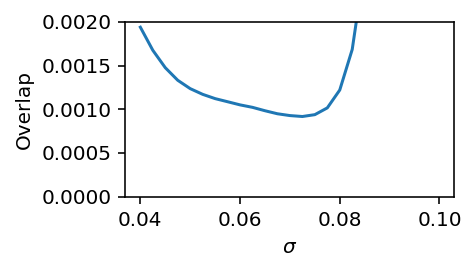

In [36]:
data=np.loadtxt('overlap_{}.dat'.format(condition))
plt.figure(figsize=(3.4,2))
plt.plot(data[:,0],data[:,1])
plt.xlabel(r'$\sigma$')
plt.ylabel('Overlap')
plt.ylim([0,0.002])

plt.tight_layout()

In [37]:
sigma_min=data[data[:,1]==min(data[:,1])][0][0]
print('Minimum overlap for sigma = {}'.format(sigma_min))

Minimum overlap for sigma = 0.0725


### Distributions

In [38]:
hist_liquid = np.loadtxt('Liquid_{}/Histo_{:.4f}'.format(condition,sigma_min))
hist_Ice = np.loadtxt('{}_{}/Histo_{:.4f}'.format(ice,condition,sigma_min))


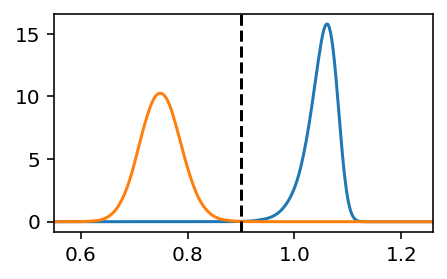

In [39]:
plt.figure(figsize=(3.4,2))
plt.plot(hist_Ice[:,0],hist_Ice[:,1])
plt.plot(hist_liquid[:,0],hist_liquid[:,1])
plt.xlim([0.3,1.3])
plt.annotate(r'$\sigma={}$'.format(sigma_min),(0.4,10))

liquid_max=hist_liquid[hist_liquid[:,1]==hist_liquid[:,1].max()][0][0]
ice_max=hist_liquid[hist_Ice[:,1]==hist_Ice[:,1].max()][0][0]



diff_val = np.abs(hist_liquid[:,1]-hist_Ice[:,1])

diff_bin = hist_liquid[:,0]
diff_val = diff_val[(diff_bin>liquid_max) * (diff_bin<ice_max)]
diff_bin = diff_bin[(diff_bin>liquid_max) * (diff_bin<ice_max)]

min_order= diff_bin[diff_val.min()==diff_val]
plt.xlim([liquid_max-0.2,ice_max+0.2])

plt.axvline(x=min_order, color='k', linestyle='--')

In [40]:
print('Liquid max:', hist_liquid[hist_liquid[:,1]==hist_liquid[:,1].max()][0][0])

Liquid max: 0.75


In [41]:
print('Ice max:', hist_Ice[hist_Ice[:,1]==hist_Ice[:,1].max()][0][0])

Ice max: 1.06


In [42]:
print('Midpoint between distribitions:', min_order[0])

Midpoint between distribitions: 0.9


## Effect of pressure on overlap

overlap_6000atm_250K.dat 0.0675
overlap_5000atm_240K.dat 0.0725


(0.0, 0.01)

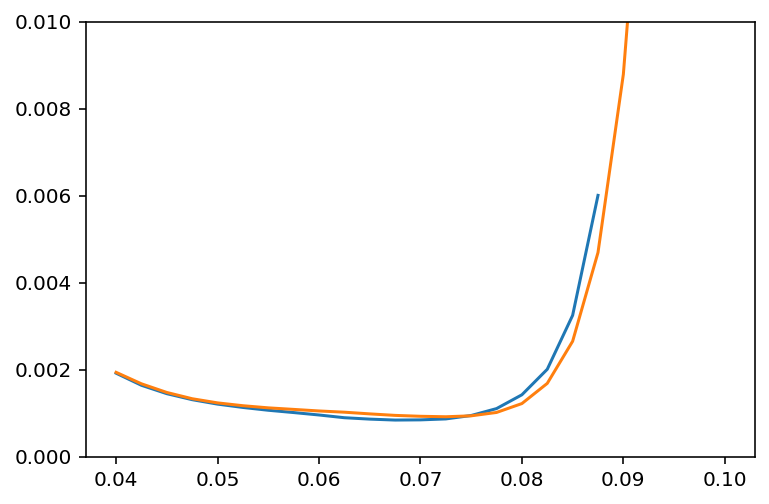

In [43]:
bars=set()
#overlaps=[]
for f in glob.glob('overlap*'):
    #try:
    data=np.loadtxt(f)
    #except:
     #   continue
    sigma_min=data[data[:,1]==min(data[:,1])][0][0]
    bars.add((f.split('/')[-1].replace('overlap_','').replace('.dat',''),sigma_min))
    print(f,sigma_min)
    #overlaps.append()
    plt.plot(data[:,0],data[:,1])
plt.ylim([0,0.01])

6000atm_250K
Liquid max: 0.7575
Ice max: 1.06
Midpoint between distribitions: [0.8925]

5000atm_240K
Liquid max: 0.75
Ice max: 1.06
Midpoint between distribitions: [0.9]

Mean
Liquid max: 0.754
Ice max: 1.060
Midpoint: 0.896


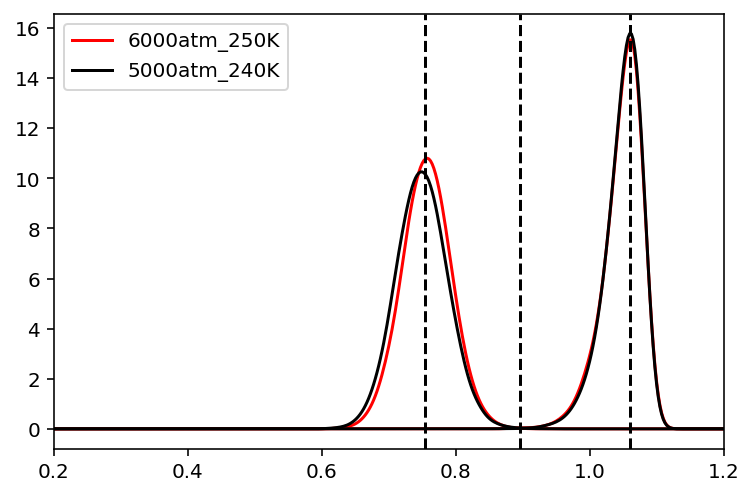

In [44]:
#Final choice
sig=0.0625

colors=['r','k','g','b']
means=[]
for i, condition in enumerate(glob.glob('overlap*')):
    cond=condition.replace('.dat','').replace('overlap_','')
    hist_liquid = np.loadtxt('Liquid_{}/Histo_{:.4f}'.format(cond,sigma_min))
    hist_Ice = np.loadtxt('{}_{}/Histo_{:.4f}'.format(ice,cond,sigma_min))

    ice_max=hist_liquid[hist_Ice[:,1]==hist_Ice[:,1].max()][0][0]
    liquid_max=hist_liquid[hist_liquid[:,1]==hist_liquid[:,1].max()][0][0]



    diff_val = np.abs(hist_liquid[:,1]-hist_Ice[:,1])

    diff_bin = hist_liquid[:,0]
    diff_val = diff_val[(diff_bin>liquid_max) * (diff_bin<ice_max)]
    diff_bin = diff_bin[(diff_bin>liquid_max) * (diff_bin<ice_max)]

    min_order= diff_bin[diff_val.min()==diff_val]
    print(cond)
    print('Liquid max:', liquid_max)
    print('Ice max:', ice_max)
    print('Midpoint between distribitions:', min_order)
    print()
    plt.plot(hist_Ice[:,0],hist_Ice[:,1],color=colors[i],label=cond)
    plt.plot(hist_liquid[:,0],hist_liquid[:,1],color=colors[i])
    means.append([liquid_max, ice_max, min_order[0]])

plt.xlim([0.2,1.2])
means=np.mean(means,axis=0)
print('Mean')
print('Liquid max: {:.3f}'.format(means[0]))
print('Ice max: {:.3f}'.format(means[1]))
print('Midpoint: {:.3f}'.format(means[2]))

plt.axvline(x=means[0],ls='--',color='k')
plt.axvline(x=means[1],ls='--',color='k')
plt.axvline(x=means[2],ls='--',color='k')

plt.legend()
